## 2023 Open Science Data Challenge - Level 1
## Model Training Notebook
## Team: Devashish Mahajan

### Team Members:
### 1) Devashish Mahajan
### 2) Rohit Chaudhari

This notebook read data files of NDVI data and RVI data. Best features are extracted from both NDVI and RVI data and features are validated using different methods. Model is trained on the best features extracted. Hyperparameter tunning is performed for model to get best results. Final prediction on test data is made using trained model.

## Notebook contains following sections:
#### 1. Loading Train Data And Test Data
#### 2. Function to extract features from data
#### 3. Check for correlation using Heatmap
####  4. Check Distribution of Train Data and Test Data using Scatterplot
#### 5. Check Distribution of Train Data and Test Data using Distplot
#### 6. 2 sample Kolmogorov–Smirnov test
#### 7. Reults of 2 sample Kolmogorov–Smirnov test
#### 8. Check for Variance Inflation Factor (VIF) 
#### 9. Check the distribution of train data and test data for all exctracted features
#### 10. Model
#### 11. Grid Search for Hyperparameter Tuning
#### 12. Grid Search Results
#### 13. Final model after hyperparameter tuning
#### 14. Save Model
#### 15. Make Predictions on Test Data and Save Predction file


In [1]:
#Importing neccessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] =[10,5]

# 1. Loading Train Data And Test Data

In [2]:
#Reading NDVI training data   
ndvi_train_raw = pd.read_csv('crop_data_landsat_cloud_filter_ndvi_43Columns_2021-11-01_2022-05-30.csv')

#Reading RVI training data
rvi_train_raw = pd.read_csv('crop_data_senti1_rvi_45Columns_2021-12-01_2022-08-30.csv',index_col = 0)

#Reading NDVI submission data
ndvi_test_raw = pd.read_csv('submission_landsat_cloud_filter_ndvi_43Columns_2021-11-01_2022-05-30.csv')

#Reading RVI submission data
rvi_test_raw = pd.read_csv('submission_vh_vv_data_rvi_45Columns_2021-12-01_2022-08-30.csv',index_col = 0)

In [3]:
ndvi_train_raw.shape,rvi_train_raw.shape,ndvi_test_raw.shape,rvi_test_raw.shape

((600, 45), (600, 47), (250, 43), (250, 45))

In [4]:
ndvi_train_raw.head(2)

Latitude and Longitude Class of Land     ndvi1     ndvi2  \
0   (10.323727047081501, 105.2516346045924)          Rice  0.686632  0.610402   
1  (10.322364360592521, 105.27843410554115)          Rice  0.659306  0.580200   

      ndvi3     ndvi4     ndvi5     ndvi6     ndvi7     ndvi8  ...    ndvi34  \
0  0.534172  0.457942  0.381712  0.305482  0.229253  0.233093  ...  0.313382   
1  0.501093  0.421987  0.342880  0.263774  0.184667  0.203444  ...  0.282769   

     ndvi35    ndvi36    ndvi37    ndvi38    ndvi39    ndvi40    ndvi41  \
0  0.424991  0.536599  0.540242  0.543885  0.699072  0.699072  0.699072   
1  0.422064  0.554025  0.621165  0.688304  0.677295  0.677295  0.677295   

     ndvi42    ndvi43  
0  0.699072  0.699072  
1  0.677295  0.677295  

[2 rows x 45 columns]

In [5]:
ndvi_test_raw.head(2)

ndvi1     ndvi2     ndvi3     ndvi4     ndvi5     ndvi6     ndvi7  \
0  0.034391  0.049119  0.063847  0.078574  0.093302  0.108030  0.122758   
1  0.389868  0.380155  0.370443  0.300873  0.231303  0.161734  0.372257   

      ndvi8     ndvi9    ndvi10  ...    ndvi34    ndvi35    ndvi36    ndvi37  \
0  0.137486  0.280228  0.401420  ...  0.664195  0.552815  0.754318  0.754318   
1  0.582780  0.805053  0.820882  ...  0.746475  0.746475  0.746475  0.746475   

     ndvi38    ndvi39    ndvi40    ndvi41    ndvi42    ndvi43  
0  0.754318  0.754318  0.754318  0.754318  0.754318  0.754318  
1  0.746475  0.746475  0.746475  0.746475  0.746475  0.746475  

[2 rows x 43 columns]

In [6]:
rvi_train_raw.head(2)

Latitude and Longitude Class of Land      rvi1      rvi2  \
0   (10.323727047081501, 105.2516346045924)          Rice  1.111368  0.617824   
1  (10.322364360592521, 105.27843410554115)          Rice  0.654609  0.787948   

       rvi3      rvi4      rvi5      rvi6      rvi7      rvi8  ...     rvi36  \
0  0.698573  0.394425  0.674144  0.316586  0.466150  0.582673  ...  0.589837   
1  0.687906  0.354302  0.465752  0.769894  0.456114  0.268524  ...  0.951499   

      rvi37     rvi38     rvi39     rvi40     rvi41     rvi42     rvi43  \
0  0.993113  0.602891  0.552731  0.603144  0.655350  0.432936  0.471715   
1  0.921718  0.932209  0.592974  0.850943  0.484364  0.528684  0.908461   

      rvi44     rvi45  
0  0.236284  0.290553  
1  0.188856  0.087447  

[2 rows x 47 columns]

In [7]:
rvi_test_raw.head(2)

rvi1      rvi2      rvi3      rvi4      rvi5      rvi6      rvi7  \
0  1.265666  1.040062  0.953330  0.481993  0.419678  0.333645  0.319963   
1  0.884043  0.690166  1.170694  0.689360  0.637310  0.308467  0.289741   

       rvi8      rvi9     rvi10  ...     rvi36     rvi37     rvi38     rvi39  \
0  0.260668  0.197258  0.239706  ...  0.785152  0.734679  0.858956  0.932741   
1  1.135938  0.410704  0.626633  ...  0.866087  0.723487  0.857754  0.888209   

      rvi40     rvi41     rvi42     rvi43     rvi44     rvi45  
0  0.718733  0.388959  0.352628  0.342057  0.365078  0.493889  
1  0.928014  0.479017  0.459849  0.537319  0.709433  0.724080  

[2 rows x 45 columns]

# 2. Function to extract features from data

In [8]:
def extract_features(df,column = 'ndvi',istrain = True):
    '''
        Returns time series dataframe
        Add time series features like diff
    
    
    ''' 
#     print('istrain',istrain)
#     print('before',df.shape)
    if istrain==False:
        columns_o = list(df.columns)
#         print(columns_o)
        df['Latitude and Longitude'] = np.arange(df.shape[0])
        df['Class of Land'] =  np.arange(df.shape[0])
        cols1 = ['Latitude and Longitude', 'Class of Land'] + list(columns_o)
#         print(cols1)
        df = df[cols1]
#     print('after',df.shape)
    
    features = []
    features.append(column)
    ncols = df.shape[1]
    cols = ['Latitude and Longitude', 'Class of Land']+[i for i in range(ncols-2)]
    df.columns = cols
    
    df_fn = df.melt(id_vars=['Latitude and Longitude', 'Class of Land'], 
        var_name="timestep", 
        value_name=column) \
    .sort_values(['Latitude and Longitude', 'Class of Land',"timestep" ]) \
    .reset_index(drop = True)
    # df_return = df_return.drop(['Class of Land','timestep'], axis = 1 ).set_index('Latitude and Longitude')
    
    # adding time series features
    
    df_fn[f'{column}_diff'] = df_fn.groupby('Latitude and Longitude')[column].diff()
    features.append(f'{column}_diff')
    
    df_return = pd.DataFrame()
    for column in features:
        df_return[f'{column}_mean'] = df_fn.groupby('Latitude and Longitude')[column].mean()
        df_return[f'{column}_var'] = df_fn.groupby('Latitude and Longitude')[column].var()
        df_return[f'{column}_min'] = df_fn.groupby('Latitude and Longitude')[column].min()
        df_return[f'{column}_max'] = df_fn.groupby('Latitude and Longitude')[column].max()

    if istrain==True:
        y = df.groupby('Latitude and Longitude')['Class of Land'].last()
        
        return df_return, y
    else:
        df_return.index = range(250)
        return df_return
    

In [9]:
# Function call to extract_features for train data
ndvi_train,ndvi_y = extract_features(ndvi_train_raw,column = 'ndvi',istrain = True)
rvi_train,rvi_y = extract_features(rvi_train_raw,column = 'rvi',istrain = True)

# Function call to extract_features for test data
ndvi_test = extract_features(ndvi_test_raw,column = 'ndvi',istrain = False)
rvi_test = extract_features(rvi_test_raw,column = 'rvi',istrain = False)

In [10]:
train = pd.merge(ndvi_train,rvi_train,left_index = True,right_index = True)
test = pd.merge(ndvi_test,rvi_test,left_index = True,right_index = True)

In [11]:
train.head()

ndvi_mean  ndvi_var  ndvi_min  \
Latitude and Longitude                                                    
(10.001224578022901, 105.50464006270187)   0.708813  0.010478  0.214791   
(10.007583781638141, 105.67270472966868)   0.615860  0.005020  0.562055   
(10.007583781638141, 105.6731589584983)    0.635387  0.003142  0.594482   
(10.008038010467802, 105.67225050083903)   0.618814  0.005068  0.564789   
(10.008038010467802, 105.67270472966868)   0.600186  0.007560  0.533142   

                                          ndvi_max  ndvi_diff_mean  \
Latitude and Longitude                                               
(10.001224578022901, 105.50464006270187)  0.823540        0.012220   
(10.007583781638141, 105.67270472966868)  0.759498       -0.002678   
(10.007583781638141, 105.6731589584983)   0.760343       -0.001956   
(10.008038010467802, 105.67225050083903)  0.764400       -0.002601   
(10.008038010467802, 105.67270472966868)  0.765797       -0.003399   

                                          ndvi_diff_var  ndvi_diff_min  \
Latitude and Longitude                                                   
(10.001224578022901, 105.50464006270187)       0.002484      -0.076554   
(10.007583781638141, 105.67270472966868)       0.000488      -0.080048   
(10.007583781638141, 105.6731589584983)        0.000400      -0.063847   
(10.008038010467802, 105.67225050083903)       0.000494      -0.078293   
(10.008038010467802, 105.67270472966868)       0.000641      -0.108962   

                                          ndvi_diff_max  rvi_mean   rvi_var  \
Latitude and Longitude                                                        
(10.001224578022901, 105.50464006270187)       0.161797  0.661732  0.096665   
(10.007583781638141, 105.67270472966868)       0.028357  0.745227  0.017470   
(10.007583781638141, 105.6731589584983)        0.031681  0.780731  0.023624   
(10.008038010467802, 105.67225050083903)       0.035455  0.744832  0.020925   
(10.008038010467802, 105.67270472966868)       0.032391  0.669559  0.016008   

                                           rvi_min   rvi_max  rvi_diff_mean  \
Latitude and Longitude                                                        
(10.001224578022901, 105.50464006270187)  0.109041  1.206993       0.017617   
(10.007583781638141, 105.67270472966868)  0.379240  1.016979      -0.002546   
(10.007583781638141, 105.6731589584983)   0.402049  1.108907       0.003932   
(10.008038010467802, 105.67225050083903)  0.445776  1.092764      -0.002373   
(10.008038010467802, 105.67270472966868)  0.474600  1.048633       0.004525   

                                          rvi_diff_var  rvi_diff_min  \
Latitude and Longitude                                                 
(10.001224578022901, 105.50464006270187)      0.052191     -0.494301   
(10.007583781638141, 105.67270472966868)      0.034108     -0.380259   
(10.007583781638141, 105.6731589584983)       0.045502     -0.504393   
(10.008038010467802, 105.67225050083903)      0.056311     -0.485785   
(10.008038010467802, 105.67270472966868)      0.027194     -0.383271   

                                          rvi_diff_max  
Latitude and Longitude                                  
(10.001224578022901, 105.50464006270187)      0.443820  
(10.007583781638141, 105.67270472966868)      0.334366  
(10.007583781638141, 105.6731589584983)       0.368244  
(10.008038010467802, 105.67225050083903)      0.646988  
(10.008038010467802, 105.67270472966868)      0.291452

In [12]:
train_with_y = pd.merge(train,rvi_y.map({'Rice':1,"Non Rice":0}),left_index = True,right_index = True)

# 3. Check for correlation using Heatmap

<Axes: >

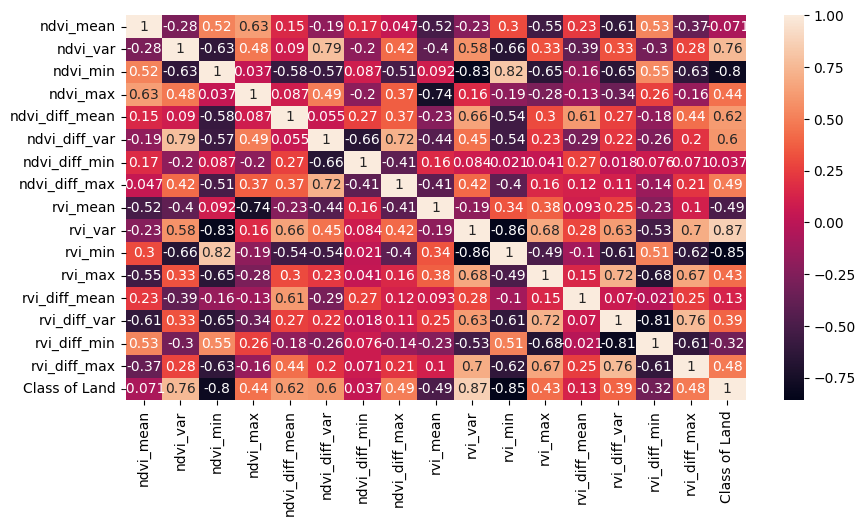

In [13]:
sns.heatmap(train_with_y.corr(),annot = True)

#  4. Check Distribution of Train Data and Test Data using Scatterplot

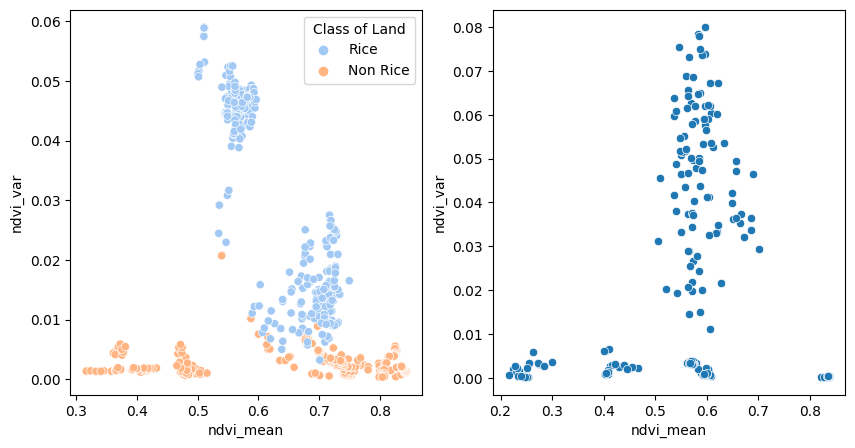

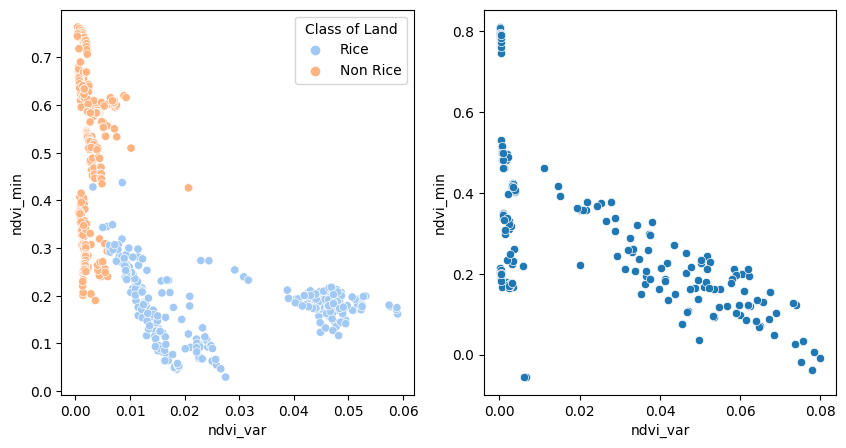

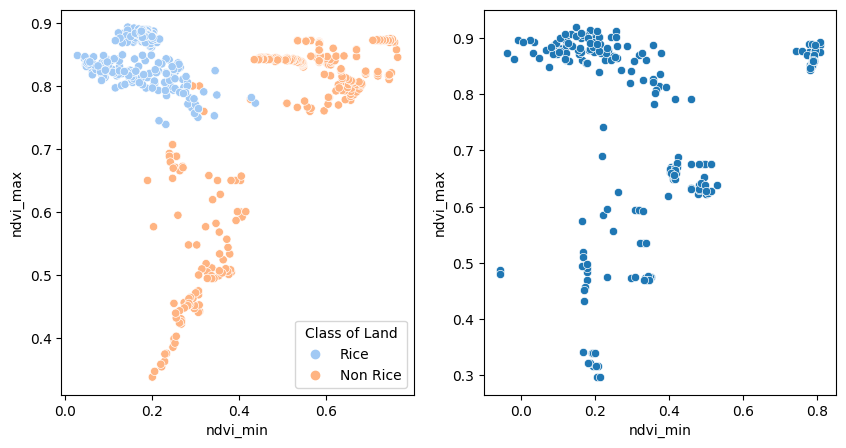

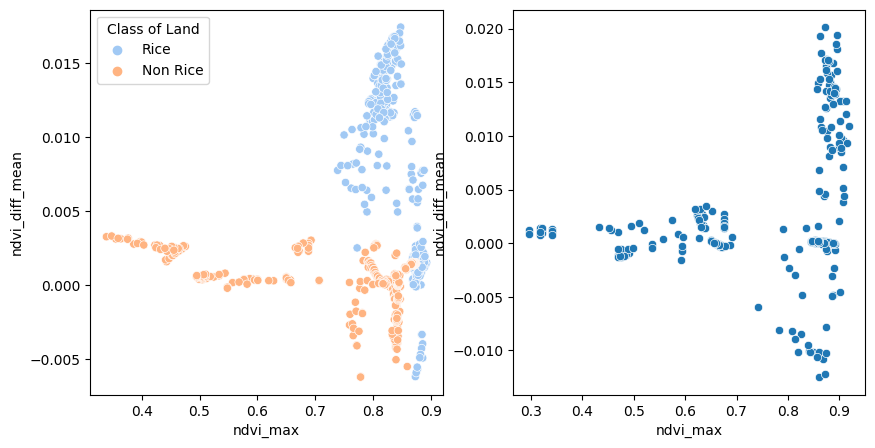

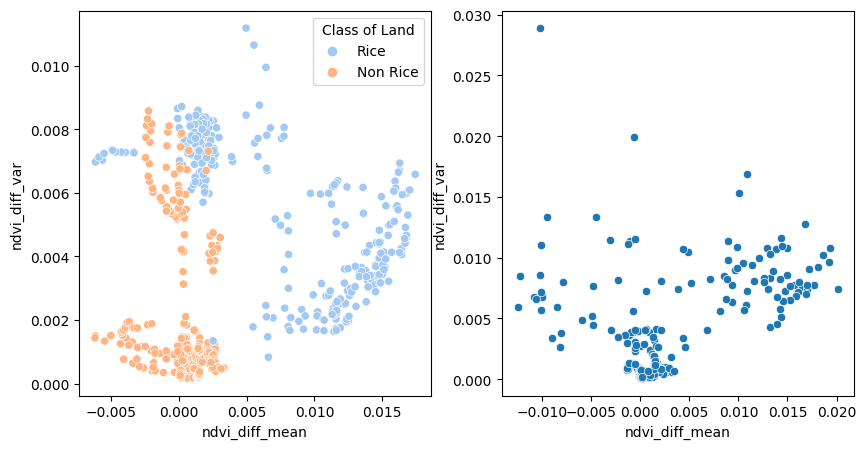

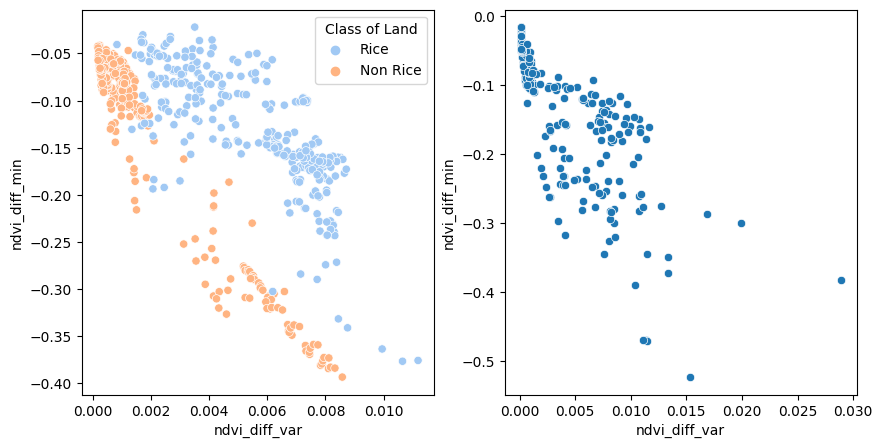

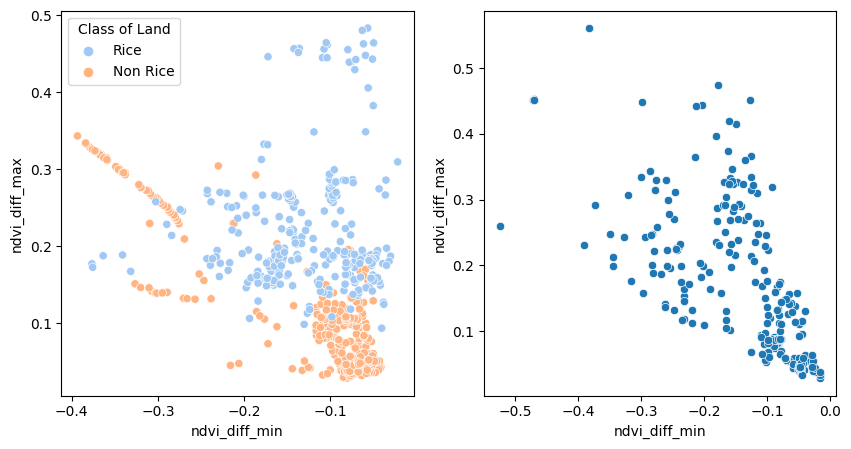

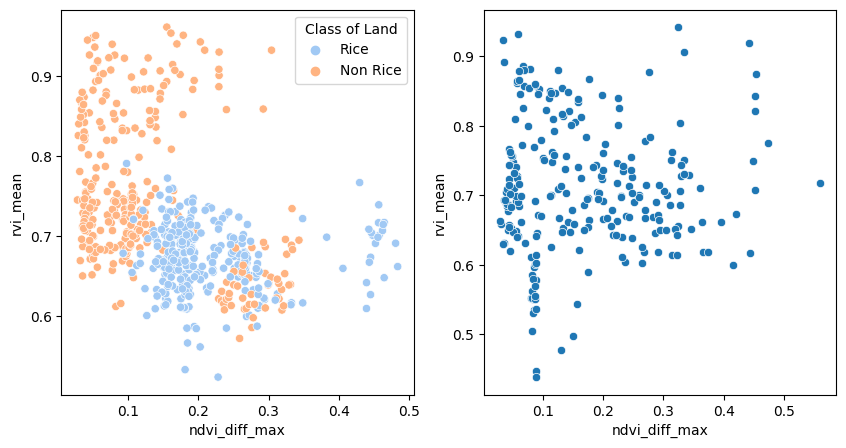

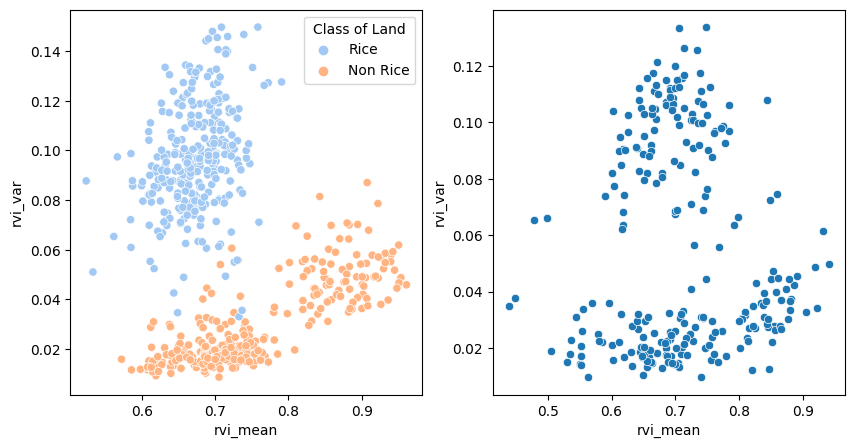

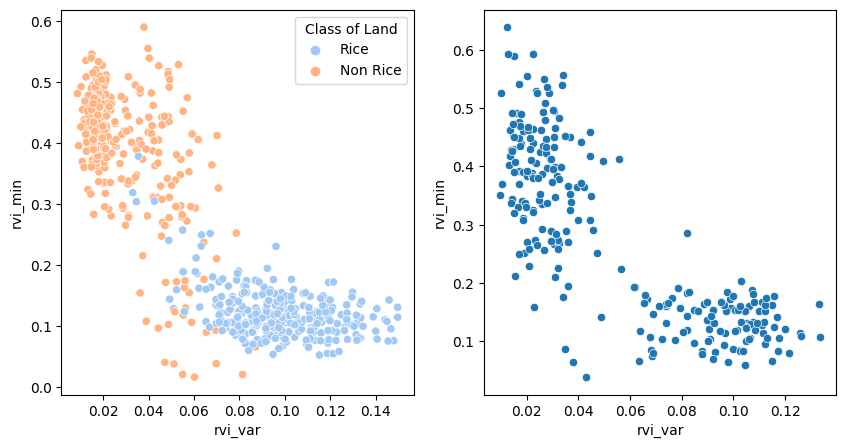

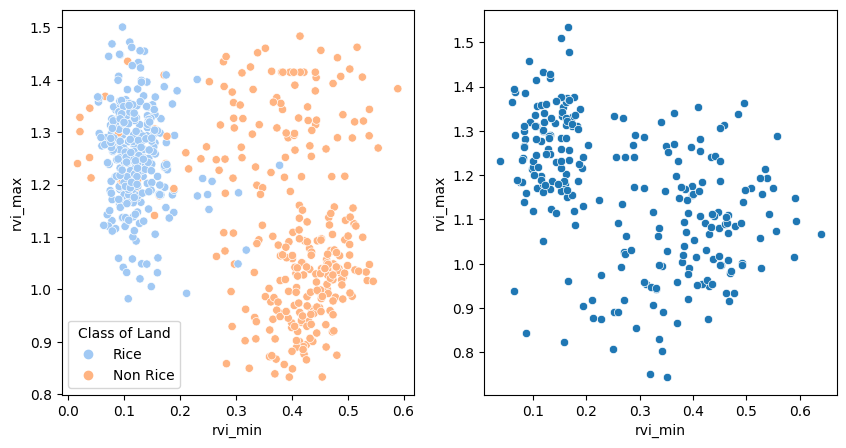

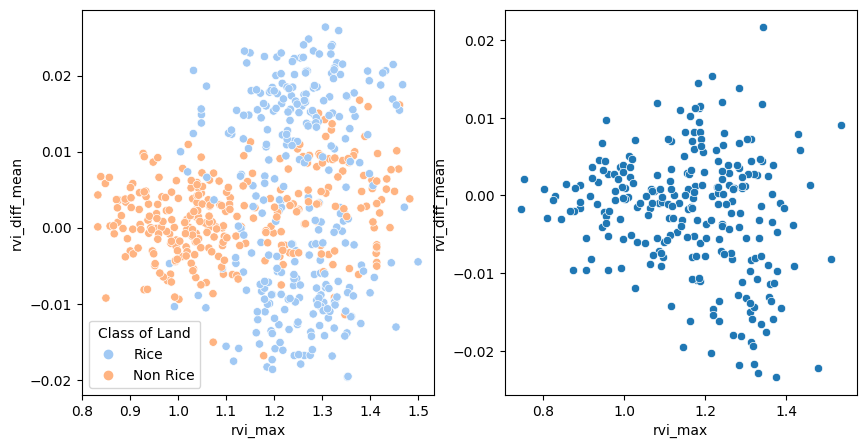

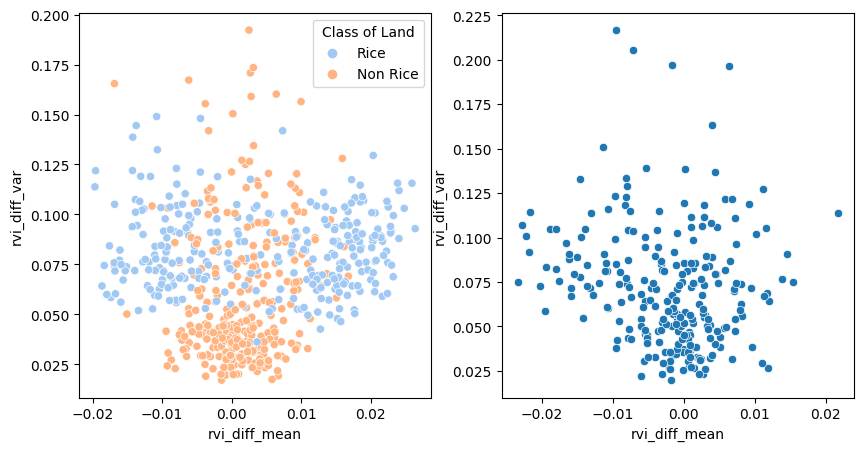

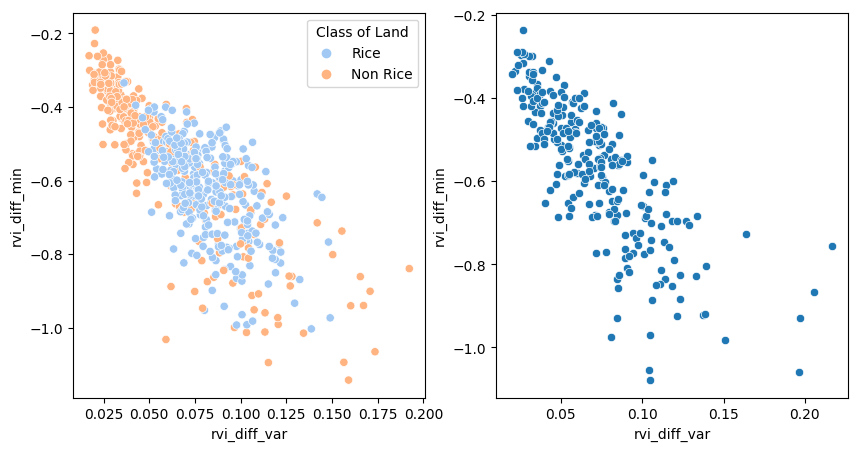

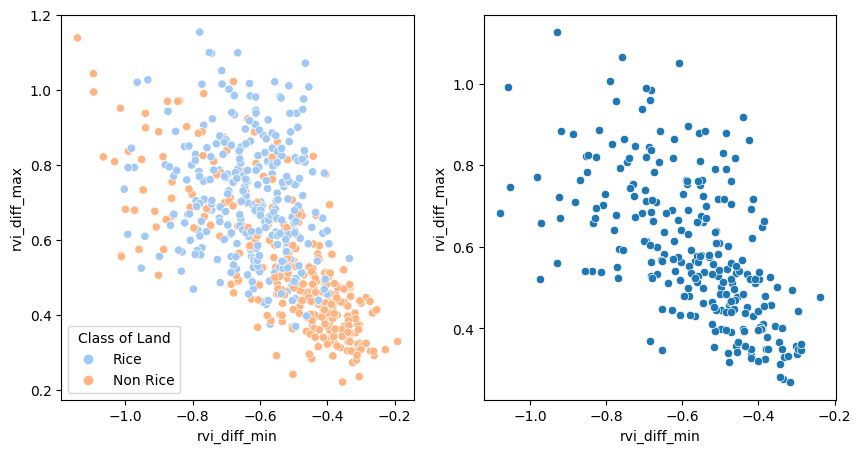

In [14]:
plt.rcParams['figure.figsize'] =[10,5]
cols = train.columns
for i in range(len(cols)-1):
    fig,axes = plt.subplots(nrows = 1,ncols = 2)
    sns.scatterplot(x=cols[i], y=cols[i+1], data=train, hue=rvi_y, palette='pastel',ax=axes[0]);
    sns.scatterplot(x=cols[i], y=cols[i+1], data=test, palette='pastel',ax = axes[1]);

# 5. Check Distribution of Train Data and Test Data using Distplot

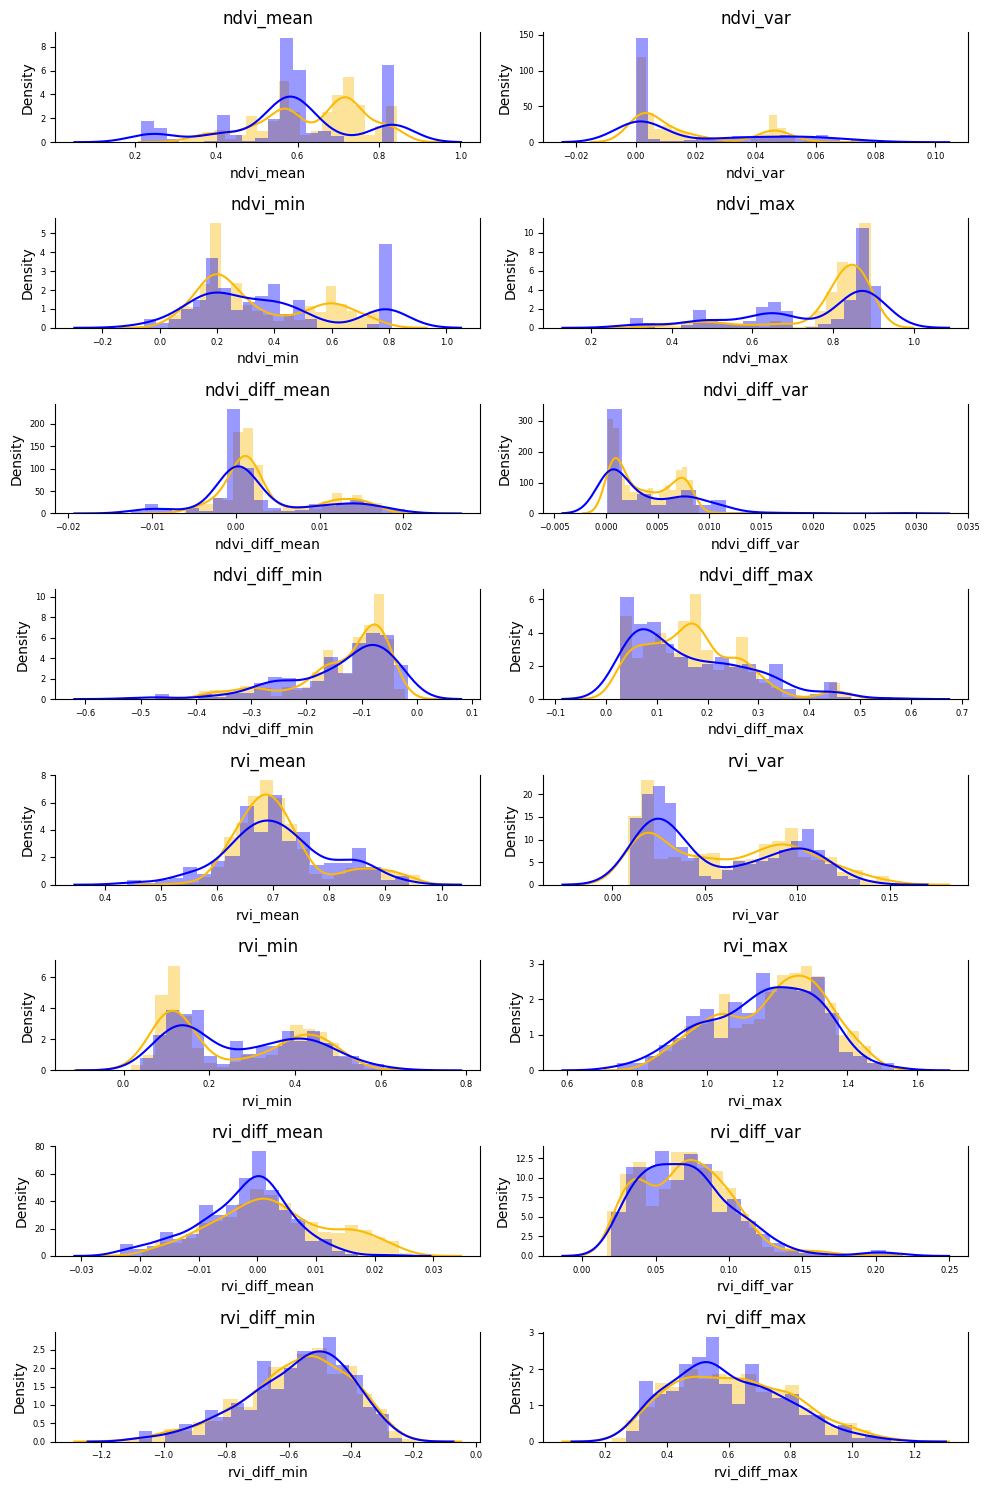

In [15]:
plt.rcParams['figure.figsize'] =[10,15]
cols = train.columns
fig,axes = plt.subplots(nrows =len(cols)//2, ncols= 2)
fig.figsize = [10,7.5]
axes = axes.flatten()
for i in range(len(cols)):
    sns.distplot(train[cols[i]],bins =20,hist = True,kde = True,color = "#fcba03",ax = axes[i])
    sns.distplot(test[cols[i]],bins =20,hist = True,kde = True,color = "b",ax = axes[i])
    axes[i].set_title(cols[i])
    axes[i].spines["top"].set_alpha(0)
    axes[i].tick_params(labelsize = 6)
#     plt.title(f"{cols[i]}")
#     plt.xlabel(f"{cols[i]}")
#     plt.ylabel("Frequency")
#     plt.show()
plt.tight_layout()

# 6. 2 sample Kolmogorov–Smirnov test

In [16]:
from scipy.stats import ks_2samp
import numpy as np

'''
    Under the null hypothesis the two distributions are identical. 
    If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%),
    then we cannot reject the hypothesis that the distributions of the two samples are the same. 
    Conversely, we can reject the null hypothesis if the p-value is low.
'''
np.random.seed(123456)
good_dist = []
statistics = []
pvalue = []
for i in range(len(cols)):
    ks_result = ks_2samp(train[cols[i]], test[cols[i]])
    p = ks_result[1]
    print(cols[i])
    print(ks_result)
    
    statistics.append(ks_result[0])
    pvalue.append(ks_result[1])
    
    if p>0.05:
        good_dist.append((cols[i],p))

ndvi_mean
KstestResult(statistic=0.30333333333333334, pvalue=7.668589272386705e-15, statistic_location=0.6668416663865326, statistic_sign=-1)
ndvi_var
KstestResult(statistic=0.267, pvalue=1.4605224278178605e-11, statistic_location=0.0010280230564616384, statistic_sign=-1)
ndvi_min
KstestResult(statistic=0.19266666666666668, pvalue=3.3240479533813877e-06, statistic_location=0.7559882666213883, statistic_sign=1)
ndvi_max
KstestResult(statistic=0.24766666666666667, pvalue=5.38103013956769e-10, statistic_location=0.6880339670320746, statistic_sign=-1)
ndvi_diff_mean
KstestResult(statistic=0.30233333333333334, pvalue=9.570317168554316e-15, statistic_location=0.0002004958842626039, statistic_sign=-1)
ndvi_diff_var
KstestResult(statistic=0.21233333333333335, pvalue=1.8974734480611518e-07, statistic_location=0.000917158981462551, statistic_sign=-1)
ndvi_diff_min
KstestResult(statistic=0.14033333333333334, pvalue=0.0017088618545357448, statistic_location=-0.050239297845127484, statistic_sign=1)

# 7. Reults of 2 sample Kolmogorov–Smirnov test

In [17]:
# Check pvalue is less than significance level
drop_cols = pd.DataFrame(data = {'cols':cols,'statistics':statistics,'pvalue':pvalue},).sort_values('pvalue').reset_index(drop = True)
drop_cols

cols  statistics        pvalue
0        ndvi_mean    0.303333  7.668589e-15
1   ndvi_diff_mean    0.302333  9.570317e-15
2         ndvi_var    0.267000  1.460522e-11
3         ndvi_max    0.247667  5.381030e-10
4    rvi_diff_mean    0.231000  9.613693e-09
5    ndvi_diff_var    0.212333  1.897473e-07
6         ndvi_min    0.192667  3.324048e-06
7          rvi_min    0.178667  2.146315e-05
8    ndvi_diff_max    0.165667  1.067182e-04
9          rvi_var    0.152333  4.867260e-04
10   ndvi_diff_min    0.140333  1.708862e-03
11         rvi_max    0.111000  2.380719e-02
12        rvi_mean    0.096333  7.054499e-02
13    rvi_diff_max    0.090333  1.052543e-01
14    rvi_diff_var    0.057667  5.787289e-01
15    rvi_diff_min    0.042667  8.901633e-01

In [18]:
drop_cols.cols[0]

'ndvi_mean'

In [19]:
train.columns

Index(['ndvi_mean', 'ndvi_var', 'ndvi_min', 'ndvi_max', 'ndvi_diff_mean',
       'ndvi_diff_var', 'ndvi_diff_min', 'ndvi_diff_max', 'rvi_mean',
       'rvi_var', 'rvi_min', 'rvi_max', 'rvi_diff_mean', 'rvi_diff_var',
       'rvi_diff_min', 'rvi_diff_max'],
      dtype='object')

# 8. Check for Variance Inflation Factor (VIF) 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = [ 'ndvi_var', 'ndvi_min', 'ndvi_diff_mean',
        'ndvi_diff_min', 'ndvi_diff_max',
        'rvi_diff_mean', 'rvi_diff_var',
       ]

X = train[cols].copy() 
X_test = test[cols].copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data.sort_values(by = 'VIF',ascending=False).reset_index(drop = True))
print('\n\n')

          feature       VIF
0   ndvi_diff_max  8.293282
1   ndvi_diff_min  5.326098
2    rvi_diff_var  5.114278
3        ndvi_var  4.237301
4  ndvi_diff_mean  3.735086
5        ndvi_min  2.683856
6   rvi_diff_mean  2.646458





# 9. Check the distribution of train data and test data for all exctracted features

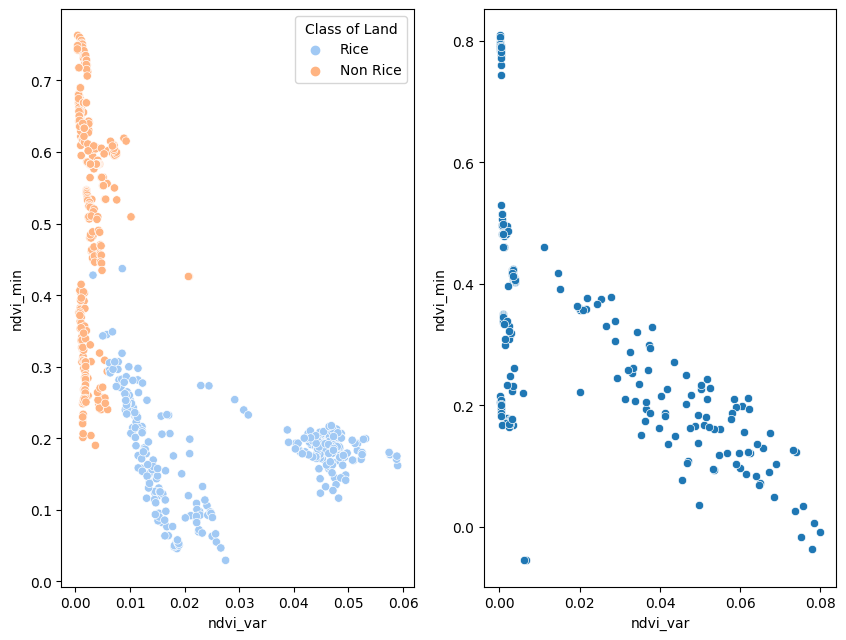

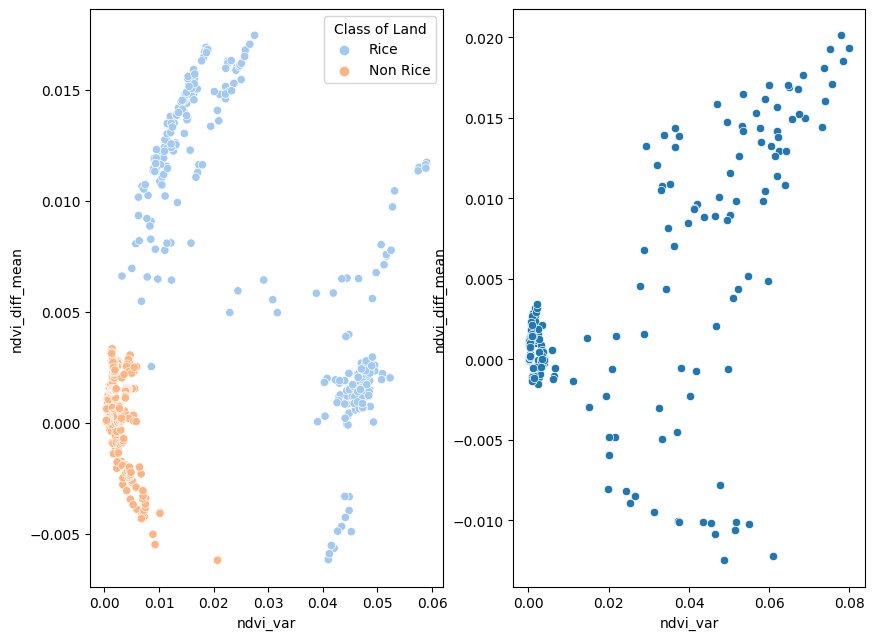

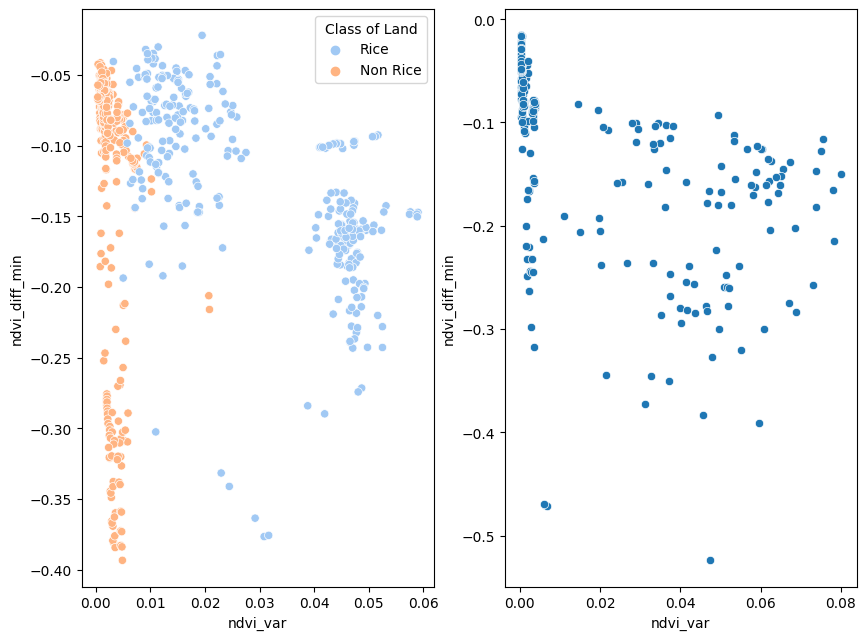

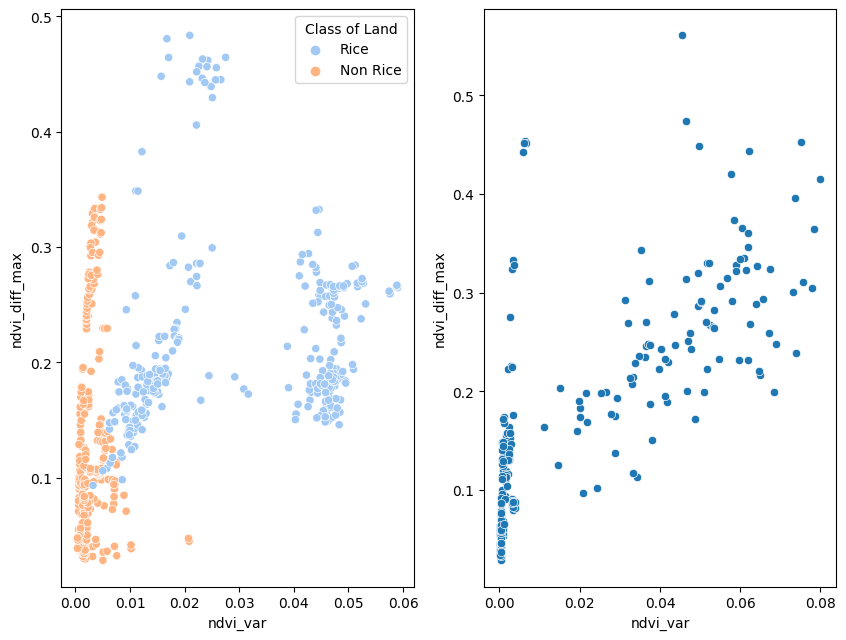

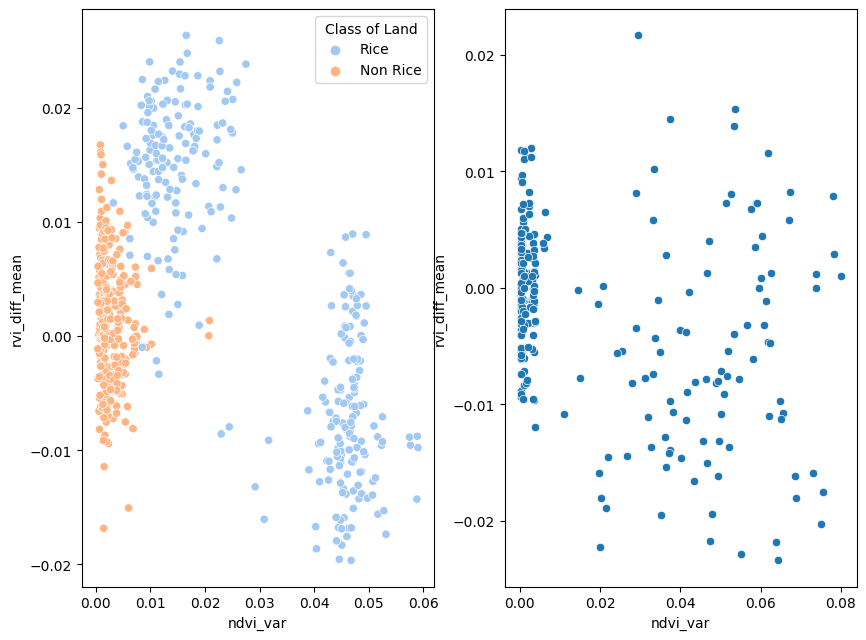

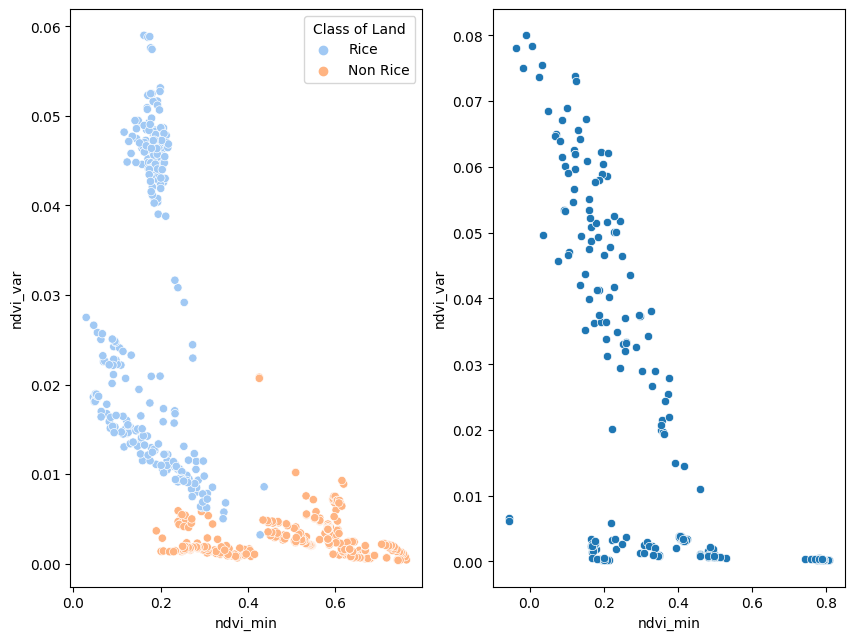

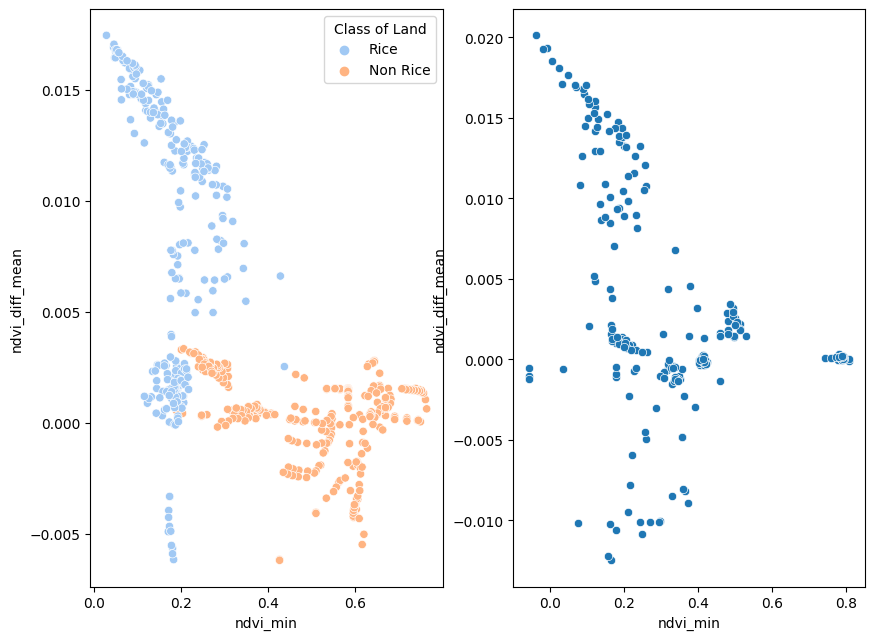

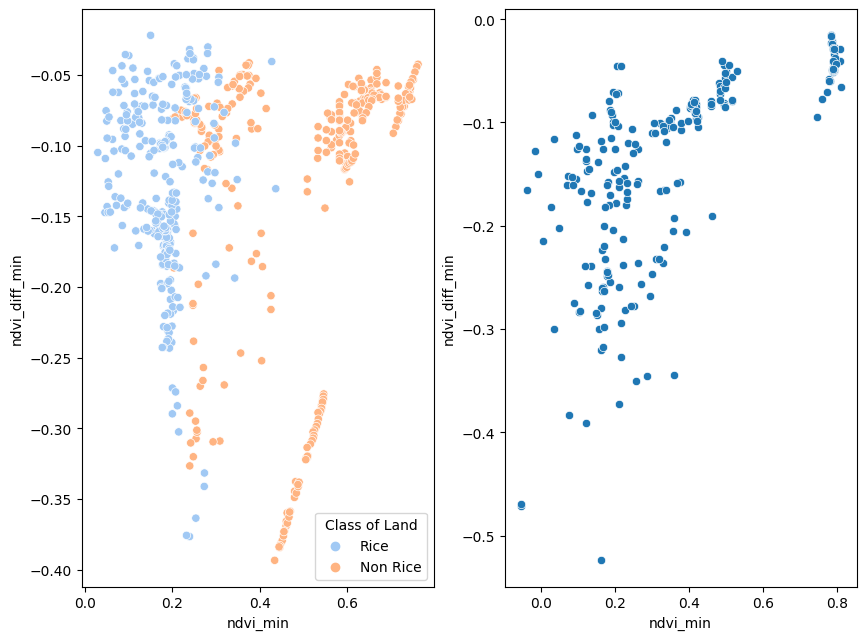

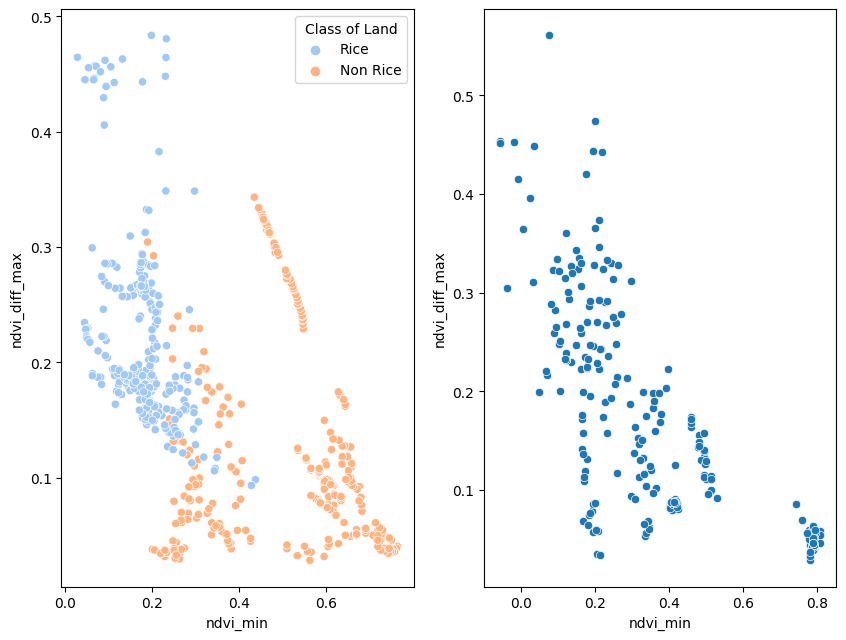

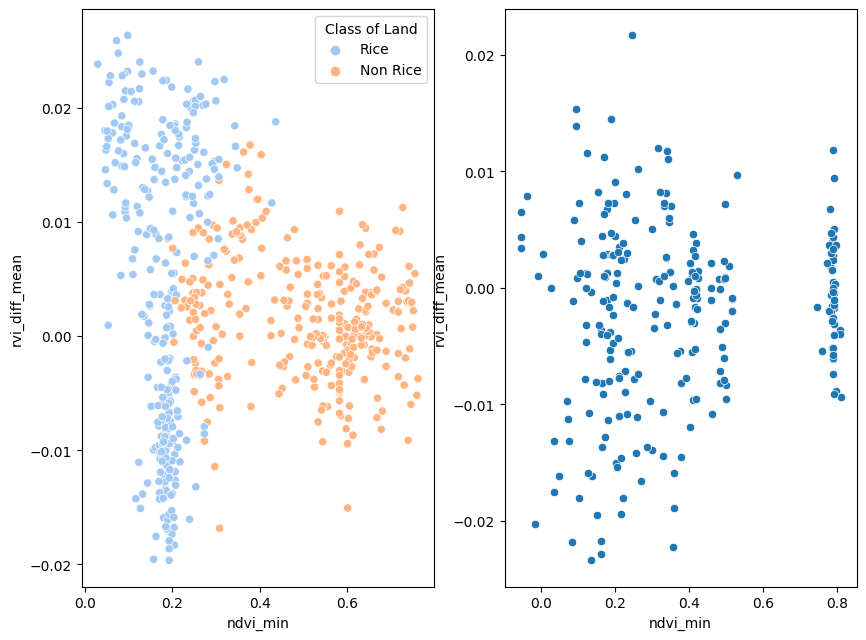

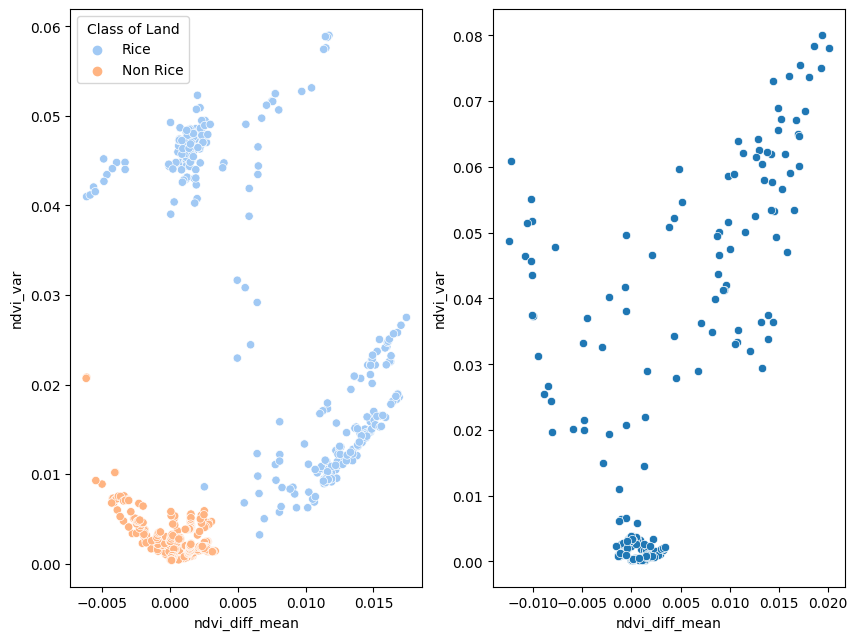

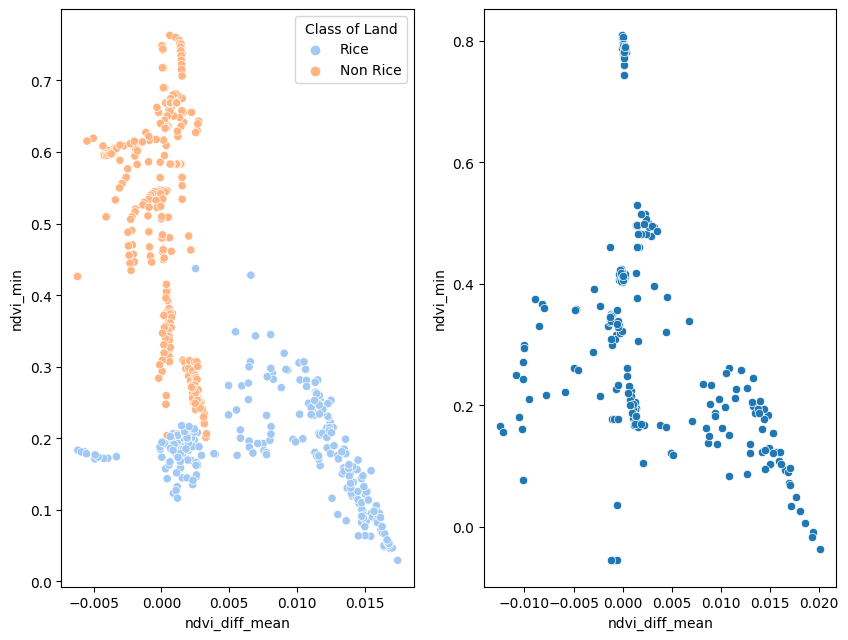

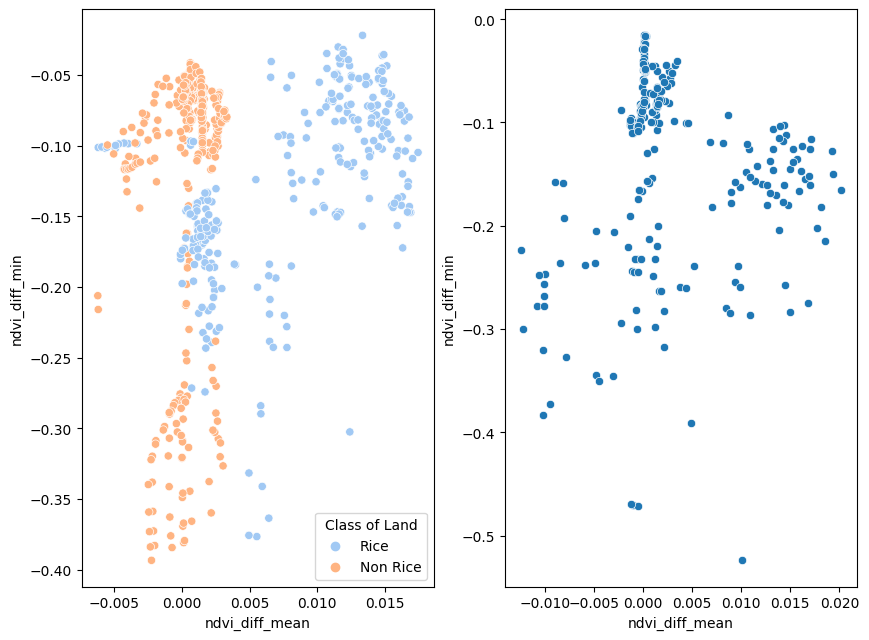

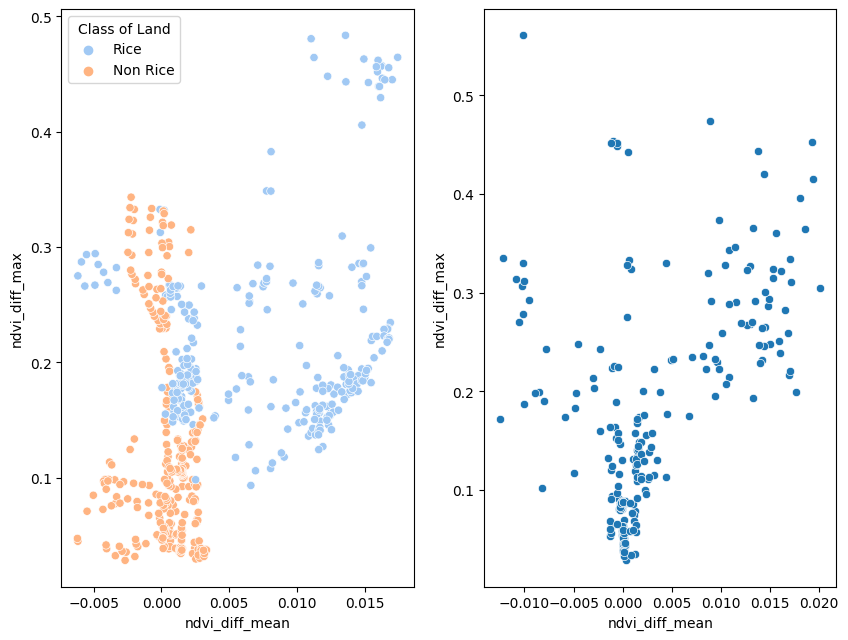

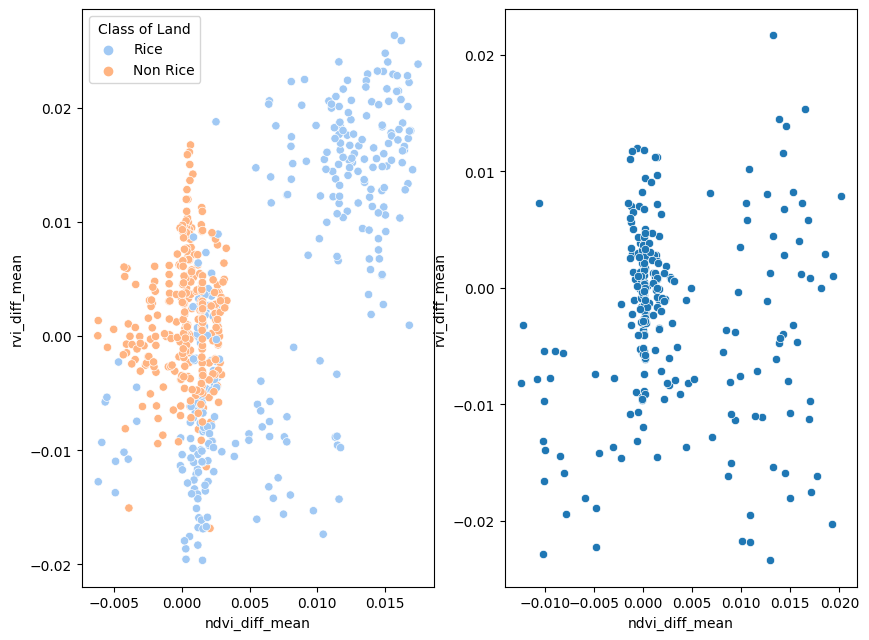

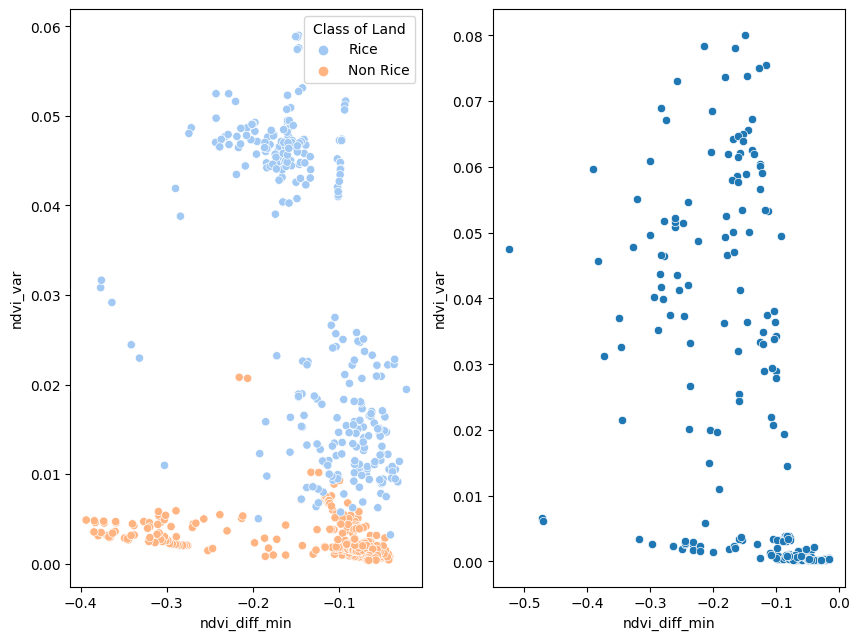

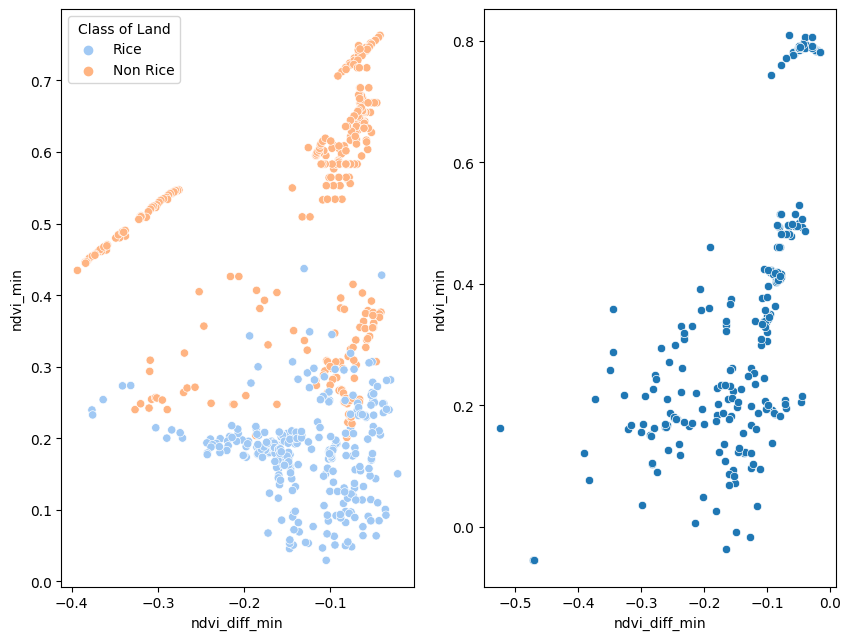

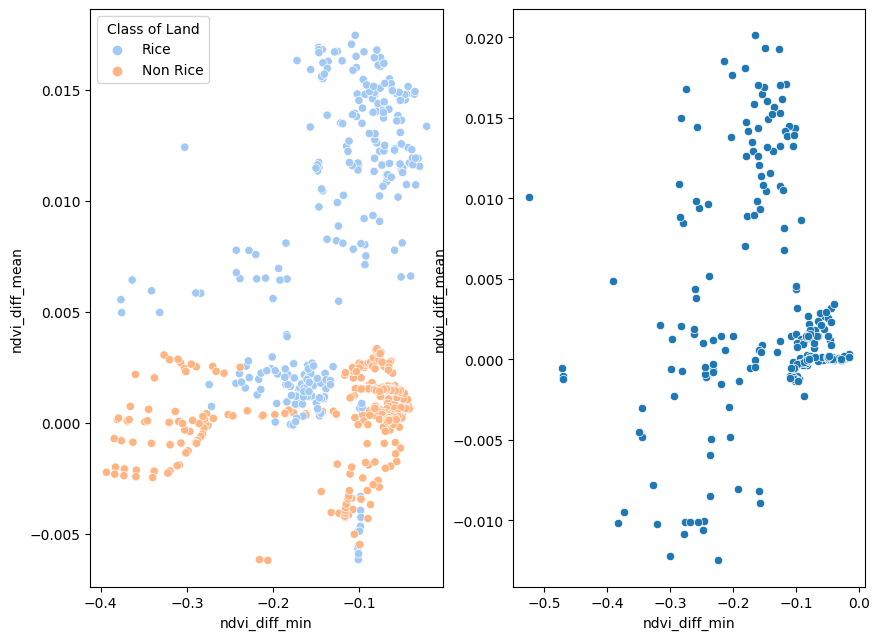

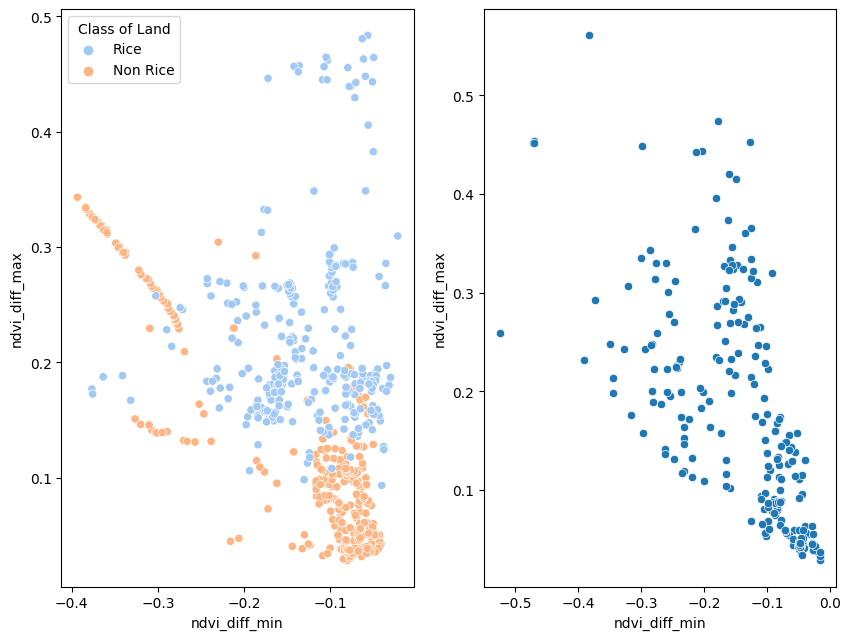

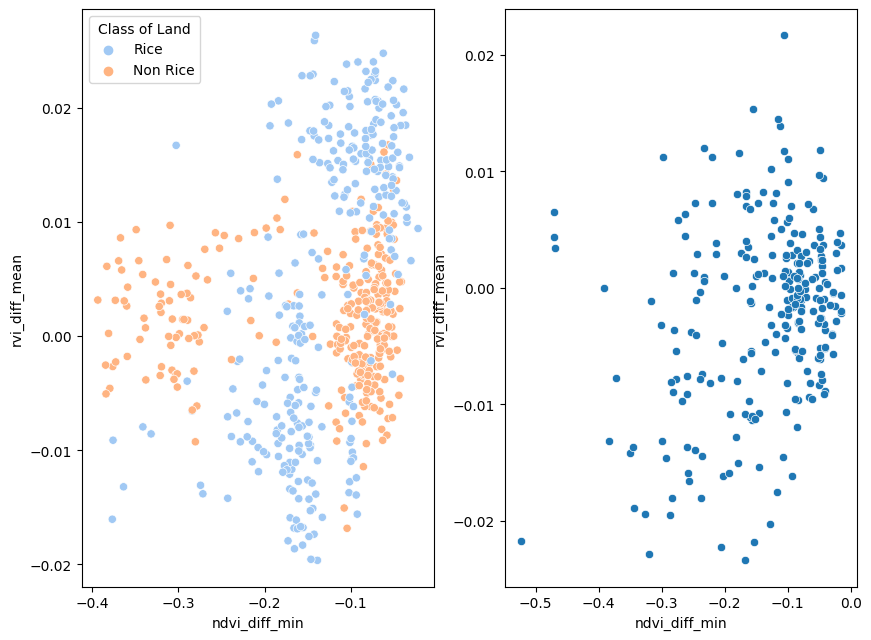

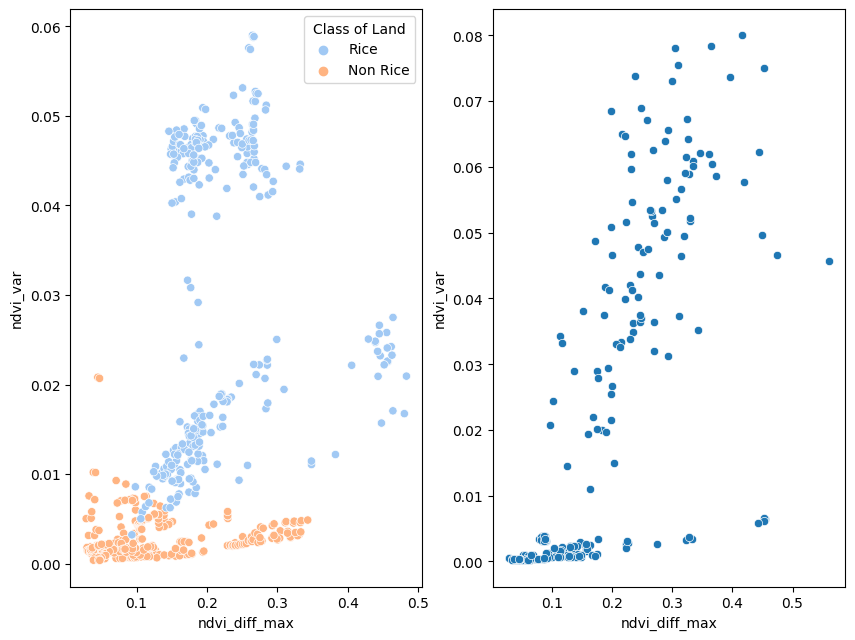

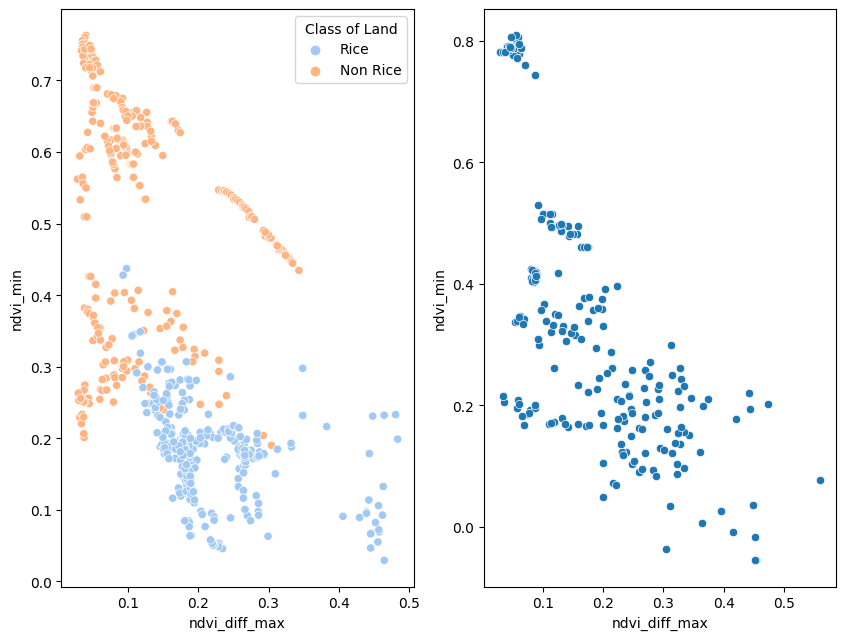

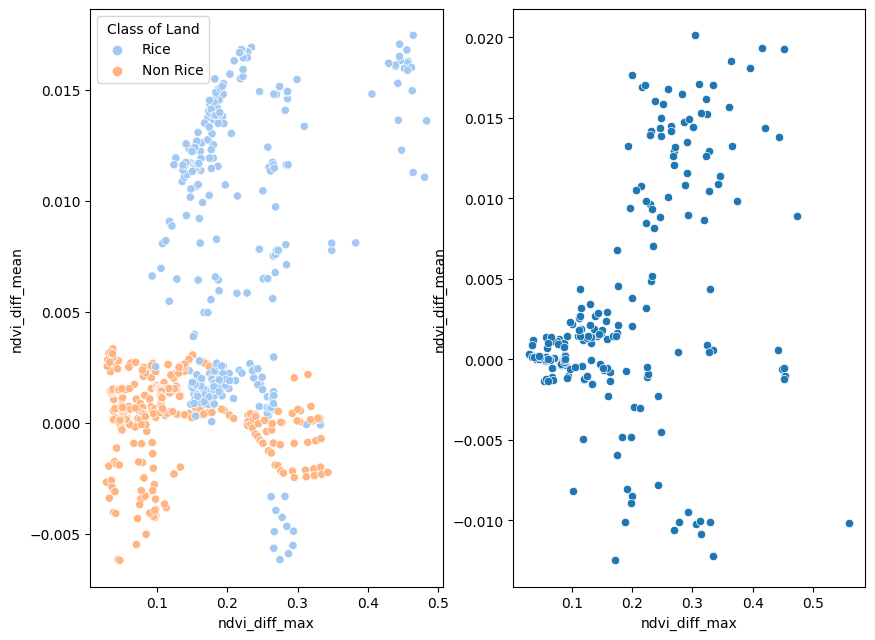

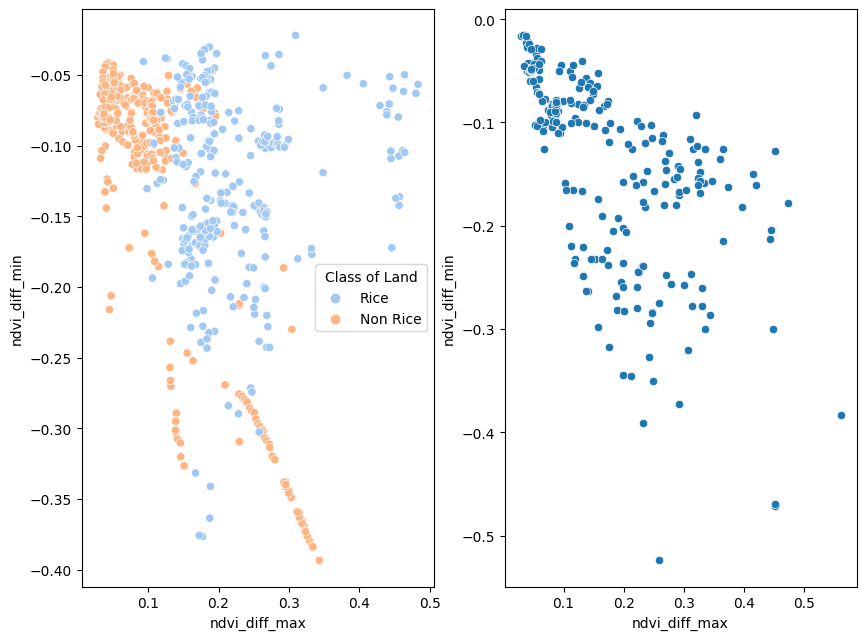

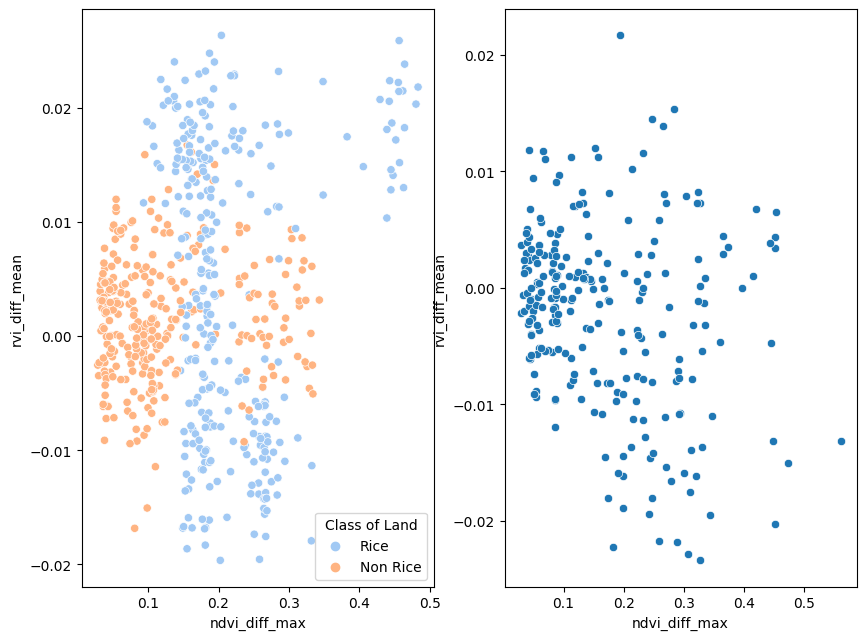

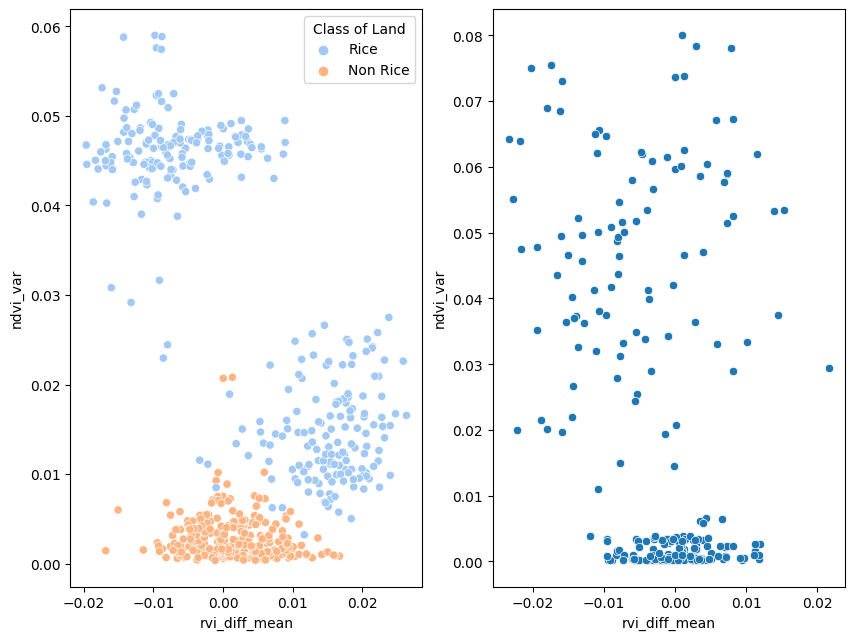

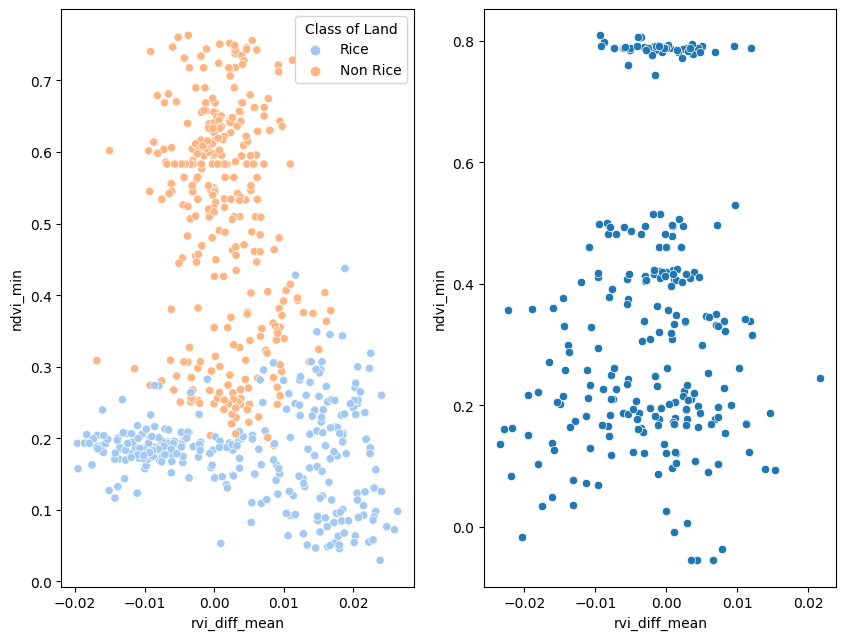

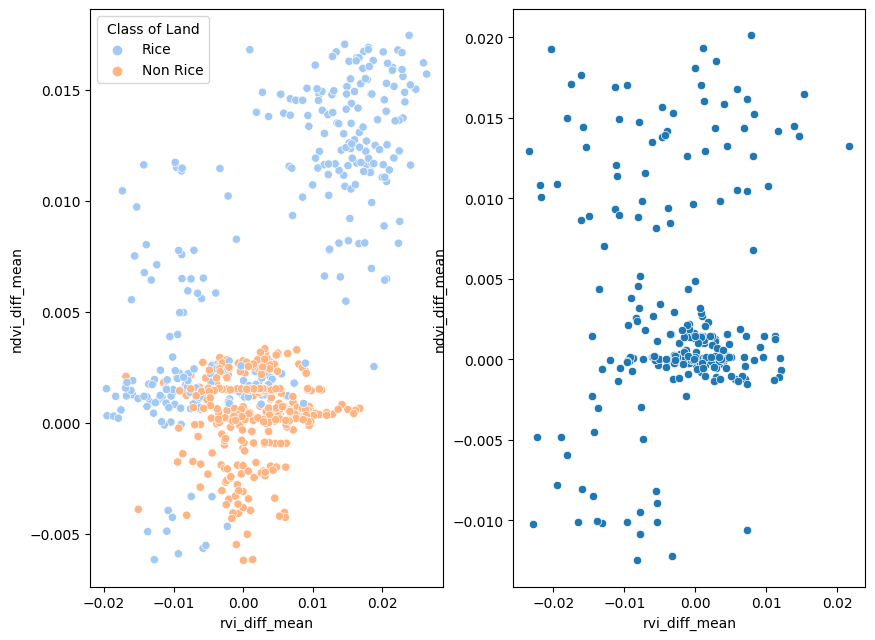

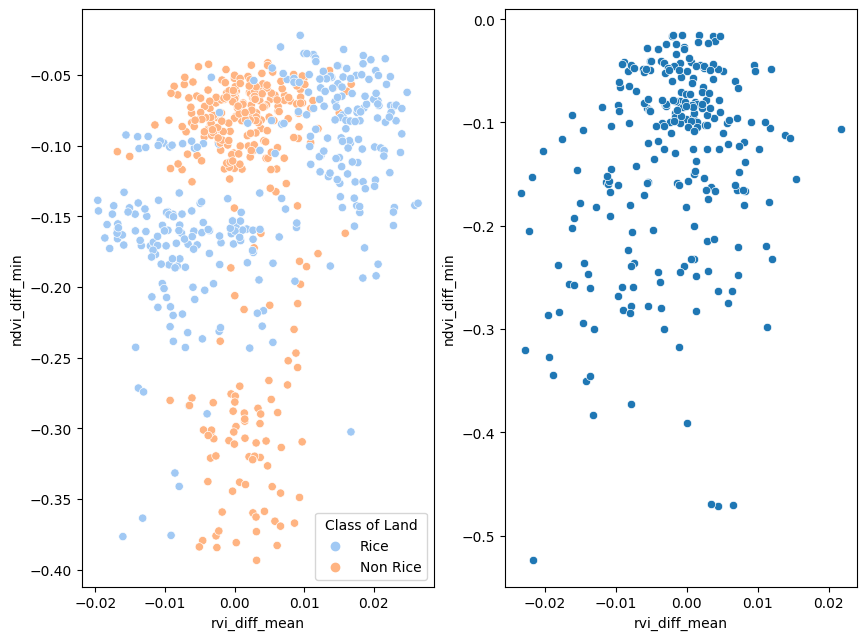

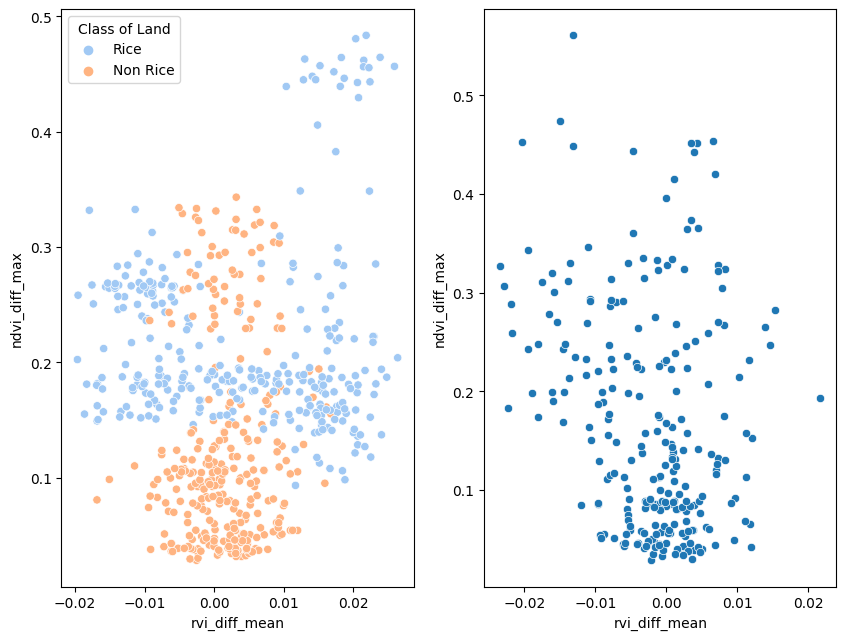

In [21]:
# Check the distribution of train data and test data for all exctracted features
plt.rcParams['figure.figsize'] =[10,7.5]
cols = X.columns
for i in range(len(cols)-1):
    for j in range(len(cols)-1):
        if i!=j:
            fig,axes = plt.subplots(nrows = 1,ncols = 2)
            sns.scatterplot(x=cols[i], y=cols[j], data=train, hue=rvi_y, palette='pastel',ax=axes[0]);
            sns.scatterplot(x=cols[i], y=cols[j], data=test, palette='pastel',ax = axes[1]);

# 10. Model

In [22]:
# Importing necessary models

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, TransformerMixin

In [23]:
X = X
y = rvi_y.map({'Rice':1,"Non Rice":0})

In [24]:
"-".join(X.columns)

'ndvi_var-ndvi_min-ndvi_diff_mean-ndvi_diff_min-ndvi_diff_max-rvi_diff_mean-rvi_diff_var'

In [25]:
scaler = StandardScaler()
lr_bagging = BaggingClassifier(LogisticRegression())
dt_bagging = BaggingClassifier(DecisionTreeClassifier())

In [26]:
lr_pipe = Pipeline(steps = [
('scaler',scaler),
('lr_bagging', lr_bagging),  
])

dt_pipe = Pipeline(steps = [
('dt_bagging', dt_bagging),  
])


In [27]:
clf = VotingClassifier(estimators = [('lr',lr_pipe),('dt',dt_pipe)],voting = 'soft')
skfold = StratifiedKFold()
clf.get_params().keys()

dict_keys(['estimators', 'flatten_transform', 'n_jobs', 'verbose', 'voting', 'weights', 'lr', 'dt', 'lr__memory', 'lr__steps', 'lr__verbose', 'lr__scaler', 'lr__lr_bagging', 'lr__scaler__copy', 'lr__scaler__with_mean', 'lr__scaler__with_std', 'lr__lr_bagging__base_estimator', 'lr__lr_bagging__bootstrap', 'lr__lr_bagging__bootstrap_features', 'lr__lr_bagging__estimator__C', 'lr__lr_bagging__estimator__class_weight', 'lr__lr_bagging__estimator__dual', 'lr__lr_bagging__estimator__fit_intercept', 'lr__lr_bagging__estimator__intercept_scaling', 'lr__lr_bagging__estimator__l1_ratio', 'lr__lr_bagging__estimator__max_iter', 'lr__lr_bagging__estimator__multi_class', 'lr__lr_bagging__estimator__n_jobs', 'lr__lr_bagging__estimator__penalty', 'lr__lr_bagging__estimator__random_state', 'lr__lr_bagging__estimator__solver', 'lr__lr_bagging__estimator__tol', 'lr__lr_bagging__estimator__verbose', 'lr__lr_bagging__estimator__warm_start', 'lr__lr_bagging__estimator', 'lr__lr_bagging__max_features', 'lr__

# 11. Grid Search for Hyperparameter Tuning

In [28]:

param_grid = {
    
    'lr__lr_bagging__n_estimators':[1,4], 
    'dt__dt_bagging__n_estimators':[2], 
    'lr__lr_bagging__random_state':[2,3],
    'dt__dt_bagging__random_state':[3],    
}
gcv = GridSearchCV(estimator = clf, param_grid = param_grid, scoring = 'f1',cv = skfold,verbose = 1)


In [29]:
%%time
gcv.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 750 ms
Wall time: 753 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=VotingClassifier(estimators=[('lr',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('lr_bagging',
                                                                      BaggingClassifier(estimator=LogisticRegression()))])),
                                                    ('dt',
                                                     Pipeline(steps=[('dt_bagging',
                                                                      BaggingClassifier(estimator=DecisionTreeClassifier()))]))],
                                        voting='soft'),
             param_grid={'dt__dt_bagging__n_estimators': [2],
                         'dt__dt_bagging__random_state': [3],
                         'lr__lr_bagging__n_estimators': [1, 4],
                         'lr__lr_bagging__random_state': [2, 3]},
             scoring='f1', verbose=1)

# 12. Grid Search Results

In [30]:
results = pd.DataFrame(gcv.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.021010      0.002180         0.005595        0.000800   
1       0.021388      0.004974         0.006615        0.002262   
2       0.035599      0.001853         0.005800        0.000748   
3       0.032619      0.001192         0.005992        0.000634   

  param_dt__dt_bagging__n_estimators param_dt__dt_bagging__random_state  \
0                                  2                                  3   
1                                  2                                  3   
2                                  2                                  3   
3                                  2                                  3   

  param_lr__lr_bagging__n_estimators param_lr__lr_bagging__random_state  \
0                                  1                                  2   
1                                  1                                  3   
2                                  4                                  2   
3                                  4                                  3   

                                              params  split0_test_score  \
0  {'dt__dt_bagging__n_estimators': 2, 'dt__dt_ba...                1.0   
1  {'dt__dt_bagging__n_estimators': 2, 'dt__dt_ba...                1.0   
2  {'dt__dt_bagging__n_estimators': 2, 'dt__dt_ba...                1.0   
3  {'dt__dt_bagging__n_estimators': 2, 'dt__dt_ba...                1.0   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0                1.0                1.0           0.983051   
1                1.0                1.0                1.0           0.983051   
2                1.0                1.0                1.0           0.983051   
3                1.0                1.0                1.0           0.983051   

   mean_test_score  std_test_score  rank_test_score  
0          0.99661         0.00678                1  
1          0.99661         0.00678                1  
2          0.99661         0.00678                1  
3          0.99661         0.00678                1

In [31]:
#selecting index 0 params for best fit
param1 = results['params'][0]
param1

{'dt__dt_bagging__n_estimators': 2,
 'dt__dt_bagging__random_state': 3,
 'lr__lr_bagging__n_estimators': 1,
 'lr__lr_bagging__random_state': 2}

In [32]:
#selecting index 3 params for best fit
param2 = results['params'][3]
param2

{'dt__dt_bagging__n_estimators': 2,
 'dt__dt_bagging__random_state': 3,
 'lr__lr_bagging__n_estimators': 4,
 'lr__lr_bagging__random_state': 3}

# 13. Final model after hyperparameter tuning

In [33]:
# param1,param2
clf1 = VotingClassifier(estimators = [('lr',lr_pipe),('dt',dt_pipe)],voting = 'soft')
clf1.set_params(**param1)
clf2 = VotingClassifier(estimators = [('lr',lr_pipe),('dt',dt_pipe)],voting = 'soft')
clf2.set_params(**param2)
clf_final = VotingClassifier(estimators = [('clf1',clf1),('clf2',clf2)],voting = 'soft')

In [34]:
# Fit Model on Train Data
clf_final.fit(X,y)

VotingClassifier(estimators=[('clf1',
                              VotingClassifier(estimators=[('lr',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('lr_bagging',
                                                                             BaggingClassifier(estimator=LogisticRegression(),
                                                                                               n_estimators=4,
                                                                                               random_state=3))])),
                                                           ('dt',
                                                            Pipeline(steps=[('dt_bagging',
                                                                             BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                                                               n_estimators=2,
                                                                                               random_state=3))]))],
                                               voting='soft')),
                             ('clf2',
                              VotingClassifier(estimators=[('lr',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('lr_bagging',
                                                                             BaggingClassifier(estimator=LogisticRegression(),
                                                                                               n_estimators=4,
                                                                                               random_state=3))])),
                                                           ('dt',
                                                            Pipeline(steps=[('dt_bagging',
                                                                             BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                                                               n_estimators=2,
                                                                                               random_state=3))]))],
                                               voting='soft'))],
                 voting='soft')

#  14. Save Model

In [35]:
import joblib

# Save the model as a pickle in a file
joblib.dump(clf_final, 'Model pkl file/clf_final.pkl')
  
# Load the model from the file
clf_final_from_joblib = joblib.load('Model pkl file/clf_final.pkl')
  
# Use the loaded model to make predictions
clf_final_from_joblib.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

# 15. Make Predictions on Test Data and Save Predction file

In [36]:
y_pred_test = clf_final_from_joblib.predict(X_test)
sub = pd.read_csv('challenge_1_submission_template_correct_columns_fixed.csv')
sub['target'] = y_pred_test
sub['target'] = sub['target'].map({1:'Rice',0:'Non Rice'})

In [37]:
sub['target'].value_counts()

Non Rice    150
Rice        100
Name: target, dtype: int64

In [38]:
sub.to_csv('submission_clf_final_20230330.csv')